In [12]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/churn-modelling/Churn_Modelling.csv


In [13]:
df = pd.read_csv("/kaggle/input/churn-modelling/Churn_Modelling.csv")

In [14]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [15]:
df.shape

(10000, 14)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [17]:
df.duplicated().sum()

0

In [18]:
df["Exited"].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

<Axes: >

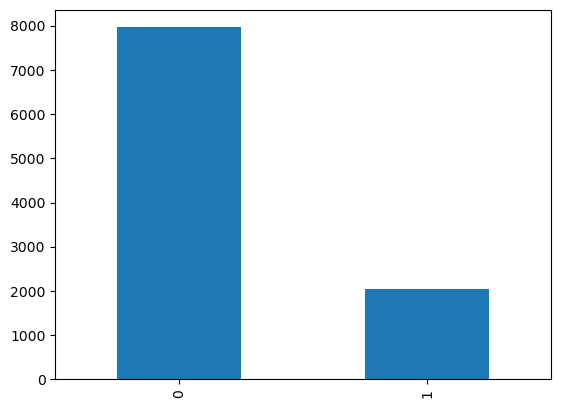

In [19]:
df["Exited"].value_counts().plot(kind="bar")

In [20]:
df["Gender"].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

<Axes: >

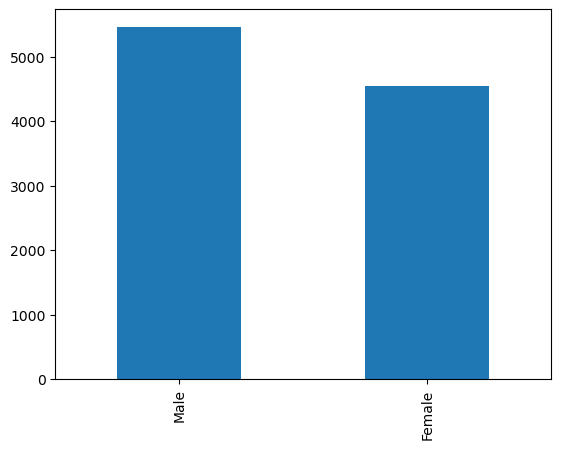

In [21]:
df["Gender"].value_counts().plot(kind="bar")

In [22]:
df.drop(columns = ["RowNumber" ,"CustomerId","Surname"], inplace=True)

In [23]:
df.head(3)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1


In [24]:
df = pd.get_dummies(df,columns = ["Geography" , "Gender"], drop_first = True)

In [25]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [26]:
from sklearn.model_selection import train_test_split

In [27]:
x = df.drop(columns = ["Exited"])
y = df["Exited"].values

In [28]:
x.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [29]:
y

array([1, 0, 1, ..., 1, 1, 0])

In [30]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.2 , random_state = 1)

In [31]:
x_train.shape

(8000, 11)

In [32]:
x_test.shape

(2000, 11)

In [33]:
from sklearn.preprocessing import StandardScaler

In [34]:
scaler = StandardScaler()

In [35]:
x_train_scaled = scaler.fit_transform(x_train)

In [36]:
x_test_scaled = scaler.transform(x_test)

In [37]:
x_train_scaled

array([[-0.23082038, -0.94449979, -0.70174202, ...,  1.71490137,
        -0.57273139,  0.91509065],
       [-0.25150912, -0.94449979, -0.35520275, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [-0.3963303 ,  0.77498705,  0.33787579, ...,  1.71490137,
        -0.57273139, -1.09278791],
       ...,
       [ 0.22433188,  0.58393295,  1.3774936 , ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 0.13123255,  0.01077067,  1.03095433, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 1.1656695 ,  0.29735181,  0.33787579, ...,  1.71490137,
        -0.57273139,  0.91509065]])

In [38]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [39]:
model = Sequential()

In [58]:
model.add(Dense(3 , activation = "relu", input_dim = 11))
model.add(Dense(1 , activation= "sigmoid"))

In [59]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 3)                 36        
                                                                 
 dense_1 (Dense)             (None, 1)                 4         
                                                                 
 dense_2 (Dense)             (None, 3)                 6         
                                                                 
 dense_3 (Dense)             (None, 1)                 4         
                                                                 
Total params: 50
Trainable params: 50
Non-trainable params: 0
_________________________________________________________________


In [60]:
model.compile(loss = "binary_crossentropy", optimizer = "Adam")

In [79]:
model.fit(x_train_scaled,y_train,epochs = 100)

Epoch 1/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4029
Epoch 2/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4027
Epoch 3/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4025
Epoch 4/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4026
Epoch 5/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4025
Epoch 6/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4025
Epoch 7/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4023
Epoch 8/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4024
Epoch 9/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4022
Epoch 10/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4022
Epoch 11/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4022
Epoch 12/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4024
Epoch 13/100


In [80]:
model.layers[0].get_weights()

[array([[ 0.03223655,  0.08920013,  0.08540062],
        [ 0.41857263, -3.4963543 ,  2.4433343 ],
        [ 0.10849756, -0.02975765,  0.10284029],
        [-0.34232777,  0.40595883,  0.79488355],
        [ 0.08473291, -0.02997966, -0.14258689],
        [ 0.05748798, -0.19541572, -0.21893859],
        [ 1.9603347 , -1.5504322 ,  0.36444908],
        [ 0.09110826, -0.04486459,  0.2740218 ],
        [-0.51153684, -0.11535817,  0.73374563],
        [-0.02218762, -0.2877367 , -0.30492565],
        [ 0.5035869 , -0.15403825, -0.69314027]], dtype=float32),
 array([-0.41331884,  0.83842325,  1.152942  ], dtype=float32)]

In [81]:
y_log = model.predict(x_test_scaled)

63/63 [==============================] - 0s 1ms/step


In [82]:
y_pred = np.where(y_log >0.5 ,1 , 0)

In [83]:
from sklearn.metrics import accuracy_score

In [84]:
accuracy_score(y_test , y_pred)

0.8345